<a href="https://colab.research.google.com/github/popescuaaa/playground/blob/master/Gans_and_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Create a simple neural network to classify iris plants

## Setup

In [1]:
import torch
import yaml
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np

## Custom dataset
## Must povide data + labels
General structure for data:
[<useless id>, f, f, f, f, l] f = fature, l = label

In [2]:
LABELS = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

In [3]:
class IrisDataset(Dataset):
    def __init__(self):
        self.raw_data = np.loadtxt('./Iris.csv', delimiter=',', dtype=np.str)
        self.len = self.raw_data.shape[0] - 1
        self.relevant_data = [[float(item[1]), float(item[2]), float(item[3]), float(item[4])] \
                     for item in self.raw_data[1:len(self.raw_data)]]

        # Processing data
        self.labels = [ [float(LABELS.index(item[5]))] for item in self.raw_data[1:len(self.raw_data)] ]

        self.data = [(None, None)] * len(self.relevant_data)

        for idx in range(len(self.relevant_data)):
          self.data[idx] = ( torch.Tensor(self.relevant_data[idx]), torch.Tensor(self.labels[idx]))

    def get_features_list(self):
      return self.raw_data[0][1:len(self.raw_data[0]) - 1]

    def __getitem__(self, index):
        data, label = self.data[index] # (data, label)
        return data, label

    def __len__(self):
        return self.len

In [4]:
ds = IrisDataset()

## Dataloader
Dataset + sampler

In [14]:
 # load yaml data
with open('simple_network.yaml', 'r') as f:
    config = yaml.load(f)

train_ds, test_ds = IrisDataset(), IrisDataset()

train_loader = DataLoader(dataset=train_ds, batch_size=int(config['batch_size']), shuffle=True)
test_loader = DataLoader(dataset=test_ds, batch_size=int(config['batch_size']), shuffle=True)


## NN

In [15]:
class IrisNet(nn.Module):
    def __init__(self, cfg):
        super(IrisNet, self).__init__()
        self.input_size = cfg['input_size']
        self.hidden_layer_1 = cfg['hidden_layer_1']
        self.hidden_layer_2 = cfg['hidden_layer_2']
        self.num_classes = cfg['num_classes']

        # define network structure
        self.fc1 = nn.Linear(self.input_size, self.hidden_layer_1)
        self.activation1 = nn.ReLU()

        self.fc2 = nn.Linear(self.hidden_layer_1, self.hidden_layer_2)
        self.activation2 = nn.ReLU()

        self.fc3 = nn.Linear(self.hidden_layer_2, self.num_classes)
        self.activation3 = nn.ReLU()

    def forward(self, batch):
        out = self.fc1(batch)
        out = self.activation1(out)
        out = self.fc2(out)
        out = self.activation2(out)
        out = self.fc3(out)
        out = self.activation3(out)
        return out



## Criterion and Optimizer

In [24]:
iris_nn = IrisNet(config)
criterion = nn.MSELoss()
optimizer = optim.SGD(iris_nn.parameters(), lr=0.01, momentum=0.9)

## Training

{'device_id': 3, 'input_size': 4, 'hidden_layer_1': 5, 'hidden_layer_2': 5, 'num_classes': 3, 'batch_size': 4}
[1,     1] loss: 0.532
[1,     2] loss: 0.353
[1,     3] loss: 2.452
[1,     4] loss: 0.622
[1,     5] loss: 0.448
[1,     6] loss: 1.198
[1,     7] loss: 2.043
[1,     8] loss: 0.836
[1,     9] loss: 1.448
[1,    10] loss: 1.374
[1,    11] loss: 1.501
[1,    12] loss: 0.458
[1,    13] loss: 0.583
[1,    14] loss: 1.057
[1,    15] loss: 1.313
[1,    16] loss: 0.741
[1,    17] loss: 0.818
[1,    18] loss: 0.203
[1,    19] loss: 0.175
[1,    20] loss: 0.981
[1,    21] loss: 0.700
[1,    22] loss: 0.790
[1,    23] loss: 2.017
[1,    24] loss: 0.182
[1,    25] loss: 1.604
[1,    26] loss: 1.315
[1,    27] loss: 0.685
[1,    28] loss: 0.595
[1,    29] loss: 1.148
[1,    30] loss: 0.628
[1,    31] loss: 1.051
[1,    32] loss: 0.593
[1,    33] loss: 0.608
[1,    34] loss: 0.886
[1,    35] loss: 0.520
[1,    36] loss: 0.537
[1,    37] loss: 0.648
[1,    38] loss: 0.343
[6,     1] loss

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[6,    23] loss: 0.972
[6,    24] loss: 1.084
[6,    25] loss: 1.305
[6,    26] loss: 1.228
[6,    27] loss: 0.192
[6,    28] loss: 1.083
[6,    29] loss: 0.339
[6,    30] loss: 0.659
[6,    31] loss: 0.114
[6,    32] loss: 1.202
[6,    33] loss: 0.327
[6,    34] loss: 1.457
[6,    35] loss: 0.524
[6,    36] loss: 0.510
[6,    37] loss: 0.264
[6,    38] loss: 0.676
[11,     1] loss: 1.322
[11,     2] loss: 0.927
[11,     3] loss: 0.400
[11,     4] loss: 0.364
[11,     5] loss: 0.903
[11,     6] loss: 0.995
[11,     7] loss: 0.281
[11,     8] loss: 0.931
[11,     9] loss: 0.267
[11,    10] loss: 1.084
[11,    11] loss: 0.563
[11,    12] loss: 1.743
[11,    13] loss: 0.569
[11,    14] loss: 0.628
[11,    15] loss: 0.893
[11,    16] loss: 0.631
[11,    17] loss: 0.669
[11,    18] loss: 0.533
[11,    19] loss: 1.070
[11,    20] loss: 0.228
[11,    21] loss: 0.754
[11,    22] loss: 0.953
[11,    23] loss: 0.369
[11,    24] loss: 0.291
[11,    25] loss: 0.092
[11,    26] loss: 0.199
[11,    

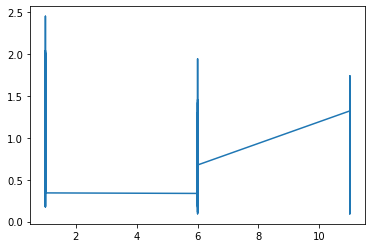

In [26]:

print(config)
losses = []
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = iris_nn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if epoch % 5 == 0:
          print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss))
          losses.append((epoch + 1, running_loss))
        running_loss = 0.0

print('Finished Training')
plt.plot([e[0] for e in losses], [e[1] for e in losses])

In [27]:
PATH = './iris_net.pth'
torch.save(iris_nn.state_dict(), PATH)

In [28]:
iris_nn_test = IrisNet(config)
iris_nn_test.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        iris, labels = data
        outputs = iris_nn_test(iris)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test iris data: %d %%' % (
    100 * correct / total))


Accuracy of the network on test iris data: 118 %


## Very Simple GAN to generate new iris data

In [31]:
# The discriminator will follow the ideea in the iris net above
# If the problem from above persits basically the Discriminator
# will be very good and will not let the Generator to make better samples

training_configuration = {
    'batch_size': 4,
    'lr': 3e-4,
    'z_size': 4,
    'num_epochs': 100
}

discriminator_in_features = {
    'input_size': 4, # the number of features
    'hidden_layer_1': 10,
    'hidden_layer_2': 10,
    'output_size': 3 # num_classes
}

generator_in_features = {
    'input_size': 4, # z_dim => noise
    'hidden_layer_1': 10,
    'hidden_layer_2': 10,
    'output_size': 4 # this will generate lists of 4 params that will be 
                    # interpreted as an iris configuration
}

In [32]:
class Generator(nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.params = in_features
    __module_list = [
        nn.Linear(self.params['input_size'], self.params['hidden_layer_1']),
        nn.ReLU(),
        nn.Linear(self.params['hidden_layer_1'], self.params['hidden_layer_2']),
        nn.ReLU(),
        nn.Linear(self.params['hidden_layer_2'], self.params['output_size']),
        nn.Tanh()
    ]

    self.__net = nn.Sequential(*__module_list)

  def forward(self, x):
     return self.__net(x)

In [33]:
class Discriminator(nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.params = in_features
    __module_list = [
        nn.Linear(self.params['input_size'], self.params['hidden_layer_1']),
        nn.ReLU(),
        nn.Linear(self.params['hidden_layer_1'], self.params['hidden_layer_2']),
        nn.ReLU(),
        nn.Linear(self.params['hidden_layer_2'], self.params['output_size']),
        nn.Sigmoid()
    ]

    self.__net = nn.Sequential(*__module_list)

  def forward(self, x):
     return self.__net(x)


## Training setup

In [34]:
D = Discriminator(discriminator_in_features)
G = Generator(generator_in_features)
optimizer_D = optim.Adam(D.parameters(), lr=training_configuration['lr'])
optimizer_G = optim.Adam(G.parameters(), lr=training_configuration['lr'])
criterion = nn.BCELoss()
fixed_noise = torch.randn((training_configuration['batch_size'], training_configuration['z_size']))

## Load data

In [35]:
ds = IrisDataset()
loader = DataLoader(dataset=ds, batch_size=int(training_configuration['batch_size']), shuffle=True)

## Trainig loop

In [38]:
for epoch in range(training_configuration['num_epochs']):
    for batch_idx, (real, _) in enumerate(loader):
        batch_size = real.shape[0]

        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        noise = torch.randn(training_configuration['batch_size'], training_configuration['z_size'])

        fake = G(noise)

        D_real = D.forward(real)

        lossD_real = criterion(D_real, torch.ones_like(D_real))

        D_fake = D.forward(fake)

        lossD_fake = criterion(D_fake, torch.zeros_like(D_fake))

        lossD = (lossD_real + lossD_fake) / 2

        D.zero_grad()

        lossD.backward(retain_graph=True)

        optimizer_D.step()

        ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        # where the second option of maximizing doesn't suffer from
        # saturating gradients

        # G(z) = fake

        output = D.forward(fake)

        lossG = criterion(output, torch.ones_like(output))

        G.zero_grad()

        lossG.backward()

        optimizer_G.step()

        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{training_configuration['num_epochs']}] Batch {batch_idx}/{len(loader)} \
                      Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
            )

            with torch.no_grad():
                fake = G(fixed_noise)
                data = real
                print('Fake: {}'.format(fake))
                print('Real: {}'.format(real))

Epoch [0/1000] Batch 0/38                       Loss D: 0.0000, loss G: 18.8789
Fake: tensor([[ 1.0000,  0.4852,  0.3843, -0.8046],
        [ 1.0000,  0.4808,  0.3777, -0.7935],
        [ 1.0000,  0.4807,  0.3779, -0.7954],
        [ 1.0000,  0.4888,  0.3838, -0.8066]])
Real: tensor([[7.9000, 3.8000, 6.4000, 2.0000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000]])
Epoch [1/1000] Batch 0/38                       Loss D: 0.0000, loss G: 18.9032
Fake: tensor([[ 1.0000,  0.5736,  0.4423, -0.8489],
        [ 1.0000,  0.5683,  0.4346, -0.8394],
        [ 1.0000,  0.5660,  0.4338, -0.8396],
        [ 1.0000,  0.5790,  0.4434, -0.8518]])
Real: tensor([[6.3000, 2.9000, 5.6000, 1.8000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.7000, 2.8000, 4.1000, 1.3000]])
Epoch [2/1000] Batch 0/38                       Loss D: 0.0000, loss G: 18.9323
Fake: tensor([[ 1.0000,  0.6

KeyboardInterrupt: ignored

# Conclusion

Basically the discriminator make a perfect decision and generator can't be fast enough to make new realistic samples from noise